In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB



from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/CRIME PROJECT/CODE/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/CRIME PROJECT/CODE


##Data Inspection

In [ ]:
#Load set data
#crime_data = pd.read_csv("/Users/cateslaven/Desktop/A- Predictive Analysis/project_code/crimedata2 (1).csv", encoding='ISO-8859-1')

crime_data.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,<NA>,<NA>,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,<NA>,<NA>,306.64,<NA>
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,<NA>,9988.79


In [ ]:
crime_data = pd.read_csv('crimedata2.csv', encoding = 'latin-1')
crime_data.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


##Data Cleaning

In [ ]:
# Check for non-numeric values before converting
def check_non_numeric(df):
    for col in df.columns:
        non_numeric = df[col][~df[col].apply(lambda x: isinstance(x, (int, float)))].count()
        if non_numeric > 0:
            print(f"Column '{col}' has {non_numeric} non-numeric entries.")


In [ ]:
#Shape of the dataset
crime_data.shape

(2215, 147)

In [ ]:
#Count all occurrences of each '?' in the dataset
question = (crime_data == '?').sum().sum()
print(question)


44592


In [ ]:
# Replace '?' with NaN
crime_data.replace('?', pd.NA, inplace=True)

In [ ]:
# Identify any non-numeric values in assaultPerPop
non_numeric = crime_data[~crime_data['assaultPerPop'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)

               Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR       <NA>          <NA>     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA       <NA>          <NA>    10   
2211            Pinevillecity    LA       <NA>          <NA>    10   
2212              Yucaipacity    CA       <NA>          <NA>    10   
2213             Beevillecity    TX       <NA>          <NA>    10   
2214       WestSacramentocity    CA       <NA>          <NA>    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37         91.78          6.50   
1    

In [ ]:
# Convert all columns to numeric, coercing non-numeric entries to NaN
data_numeric = crime_data.apply(pd.to_numeric, errors='coerce')


In [ ]:
data_numeric.shape

(2215, 147)

In [ ]:
# Check for duplicates
duplicates = data_numeric.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data_numeric.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [ ]:
# Clean column names
data_numeric.columns = data_numeric.columns.str.strip()

# Identify nominal variables to exclude
nominal_columns = ['Êcommunityname', 'state']

# Check for columns before dropping
existing_columns_to_drop = [col for col in nominal_columns if col in data_numeric.columns]
data_numeric = data_numeric.drop(columns=existing_columns_to_drop)

# Check for remaining NaN values
print("NaN values in remaining columns:")
print(data_numeric.isna().sum())

# Identify numeric columns automatically
numeric_columns = data_numeric.select_dtypes(include=['number']).columns

# Convert columns to numeric, coercing errors
for col in numeric_columns:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Handle missing values with a more informed strategy (use median for skewed distributions)
data_numeric.fillna(data_numeric.median(), inplace=True)


NaN values in remaining columns:
countyCode             1221
communityCode          1224
fold                      0
population                0
householdsize             0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 145, dtype: int64


In [ ]:
# # Identify nominal variables to exclude
# nominal_columns = ['Êcommunityname', 'state']
# data_numeric = data_numeric.drop(columns=nominal_columns)

# # Check for remaining NaN values
# print("NaN values in remaining columns:")
# print(data_numeric.isna().sum())

# for col in numeric_columns:
#     data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')



# # Handle missing values with a more informed strategy
# data_numeric.fillna(data_numeric.median(), inplace=True)  # Use median for skewed distributions

In [ ]:
# # Identify nominal variables to exclude
# nominal_columns = ['Êcommunityname', 'state']

# # Keep only numeric columns for analysis
# data_numeric = data_numeric.drop(columns=nominal_columns)

# # Convert relevant columns to numeric, coercing errors to NaN
# # This step is not strictly necessary since we've already coerced everything to numeric
# # but it can be useful to ensure specific columns are converted correctly.
# numeric_columns = data_numeric.select_dtypes(include=[np.number]).columns.tolist()



# for col in numeric_columns:
#     data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# # Check for any remaining non-numeric values
# for column in numeric_columns:
#     non_numeric = crime_data[column].isna().sum()
#     print(f"NaN values in column '{column}': {non_numeric}")

# # Handle missing values
# data_numeric.fillna(data_numeric.median(), inplace=True)

In [ ]:
# Confirm that there are no remaining NaN values
print("Remaining NaN values after imputation:")
print(data_numeric.isna().sum())

Remaining NaN values after imputation:
countyCode             0
communityCode          0
fold                   0
population             0
householdsize          0
                      ..
autoTheftPerPop        0
arsons                 0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
Length: 145, dtype: int64


##Feature Inspection

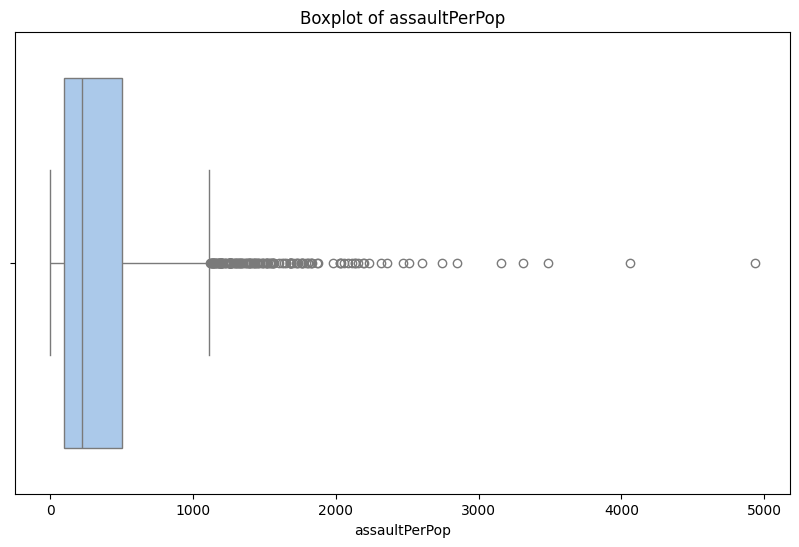

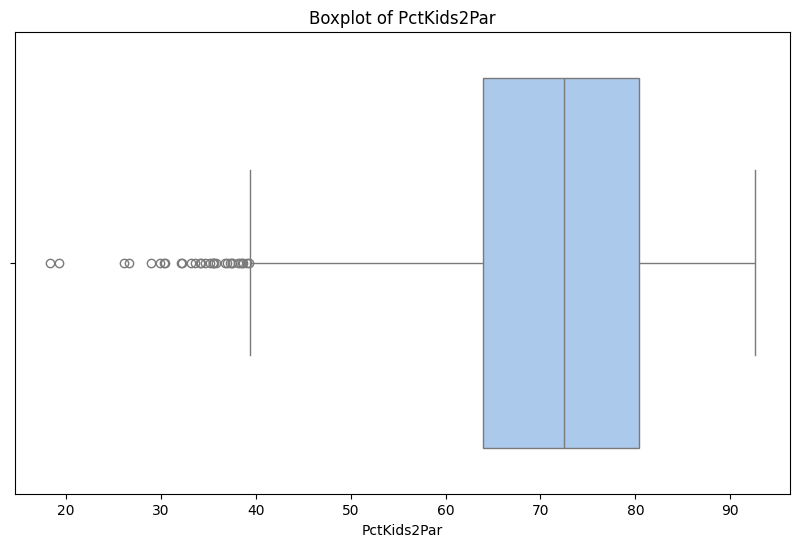

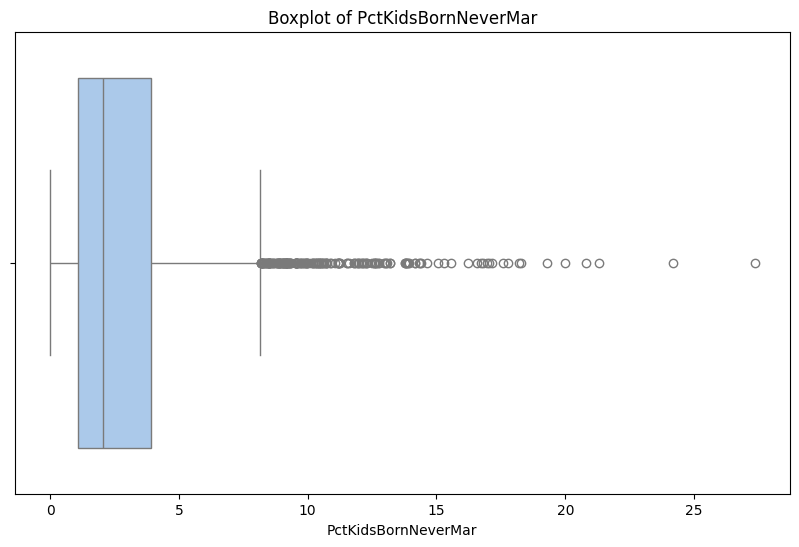

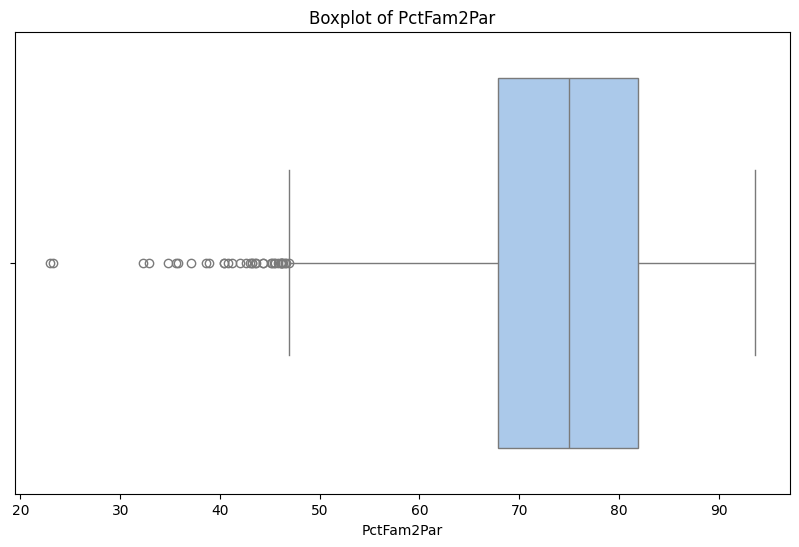

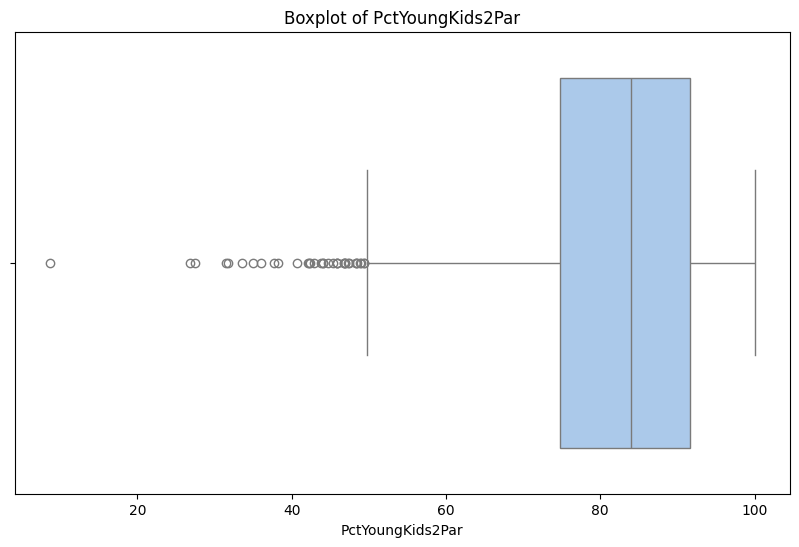

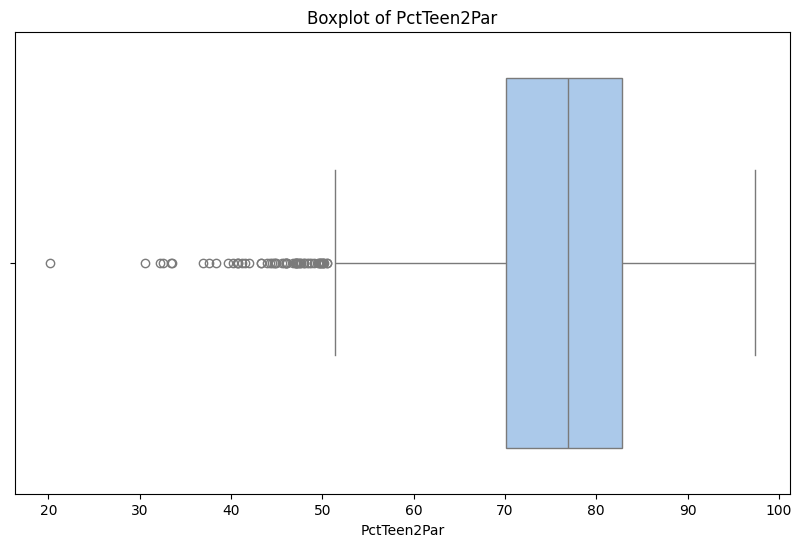

In [ ]:
key_features = [
    'assaultPerPop',
    'PctKids2Par',
    'PctKidsBornNeverMar',
    'PctFam2Par',
    'PctYoungKids2Par',
    'PctTeen2Par'
]

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_numeric[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(f"{feature}")
    plt.show()

In [ ]:
# Check for outliers
for col in numeric_columns:
    Q1 = data_numeric[col].quantile(0.25)
    Q3 = data_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_numeric[(data_numeric[col] < lower_bound) | (data_numeric[col] > upper_bound)]
    print(f"Outliers in column '{col}': {len(outliers)}")

Outliers in column 'countyCode': 957
Outliers in column 'communityCode': 990
Outliers in column 'fold': 0
Outliers in column 'population': 219
Outliers in column 'householdsize': 93
Outliers in column 'racepctblack': 252
Outliers in column 'racePctWhite': 88
Outliers in column 'racePctAsian': 240
Outliers in column 'racePctHisp': 268
Outliers in column 'agePct12t21': 153
Outliers in column 'agePct12t29': 151
Outliers in column 'agePct16t24': 206
Outliers in column 'agePct65up': 38
Outliers in column 'numbUrban': 165
Outliers in column 'pctUrban': 0
Outliers in column 'medIncome': 43
Outliers in column 'pctWWage': 25
Outliers in column 'pctWFarmSelf': 117
Outliers in column 'pctWInvInc': 2
Outliers in column 'pctWSocSec': 19
Outliers in column 'pctWPubAsst': 76
Outliers in column 'pctWRetire': 34
Outliers in column 'medFamInc': 63
Outliers in column 'perCapInc': 111
Outliers in column 'whitePerCap': 119
Outliers in column 'blackPerCap': 72
Outliers in column 'indianPerCap': 133
Outliers

In [ ]:
# Sum of the total number of outliers
total_outliers = 0
outlier_summary = {}
for col in numeric_columns:
    Q1 = data_numeric[col].quantile(0.25)
    Q3 = data_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_numeric[(data_numeric[col] < lower_bound) | (data_numeric[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_summary[col] = outlier_count
    total_outliers += outlier_count

# Print total outlier count
print(f"Total outliers in the entire dataset: {total_outliers}")


Total outliers in the entire dataset: 23285


## Feature Outlier Removal

In [ ]:
# Remove outliers using Z-score
nonOutlier = np.ones(len(data_numeric), dtype=bool)

for col in numeric_columns:
    z_scores = np.abs((data_numeric[col] - data_numeric[col].mean()) / data_numeric[col].std())
    nonOutlier &= (z_scores <= 3)

# Filter the dataset to keep only nonOutliers
data_numeric = data_numeric[nonOutlier]

In [ ]:
#Check for remaining outliers using Z-score
for col in numeric_columns:
    z_scores = np.abs((data_numeric[col] - data_numeric[col].mean()) / data_numeric[col].std())
    print(f"Remaining outliers in column '{col}': {len(z_scores[z_scores > 3])}")


Remaining outliers in column 'countyCode': 37
Remaining outliers in column 'communityCode': 0
Remaining outliers in column 'fold': 0
Remaining outliers in column 'population': 21
Remaining outliers in column 'householdsize': 8
Remaining outliers in column 'racepctblack': 38
Remaining outliers in column 'racePctWhite': 23
Remaining outliers in column 'racePctAsian': 30
Remaining outliers in column 'racePctHisp': 33
Remaining outliers in column 'agePct12t21': 19
Remaining outliers in column 'agePct12t29': 22
Remaining outliers in column 'agePct16t24': 28
Remaining outliers in column 'agePct65up': 3
Remaining outliers in column 'numbUrban': 17
Remaining outliers in column 'pctUrban': 0
Remaining outliers in column 'medIncome': 2
Remaining outliers in column 'pctWWage': 3
Remaining outliers in column 'pctWFarmSelf': 20
Remaining outliers in column 'pctWInvInc': 0
Remaining outliers in column 'pctWSocSec': 0
Remaining outliers in column 'pctWPubAsst': 17
Remaining outliers in column 'pctWRe

In [ ]:
# # Check for remaining outliers in each column after removal
# remOutliers = {}
# for col in numeric_columns:
#     Q1 = data_numeric[col].quantile(0.25)
#     Q3 = data_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = data_numeric[(data_numeric[col] < lower_bound) | (data_numeric[col] > upper_bound)]
#     remOutliers[col] = len(outliers)

# # Outliers left after removal (Any remaining are within 3 standard deviations)
# print("\nRemaining outliers after removal:")
# for col, count in remOutliers.items():
#     print(f"{col}: {count} outliers")

In [ ]:
# Check for any remaining non-numeric values
for column in numeric_columns:
    non_numeric = crime_data[column].isna().sum()
    print(f"NaN values in '{column}': {non_numeric}")


NaN values in 'countyCode': 1221
NaN values in 'communityCode': 1224
NaN values in 'fold': 0
NaN values in 'population': 0
NaN values in 'householdsize': 0
NaN values in 'racepctblack': 0
NaN values in 'racePctWhite': 0
NaN values in 'racePctAsian': 0
NaN values in 'racePctHisp': 0
NaN values in 'agePct12t21': 0
NaN values in 'agePct12t29': 0
NaN values in 'agePct16t24': 0
NaN values in 'agePct65up': 0
NaN values in 'numbUrban': 0
NaN values in 'pctUrban': 0
NaN values in 'medIncome': 0
NaN values in 'pctWWage': 0
NaN values in 'pctWFarmSelf': 0
NaN values in 'pctWInvInc': 0
NaN values in 'pctWSocSec': 0
NaN values in 'pctWPubAsst': 0
NaN values in 'pctWRetire': 0
NaN values in 'medFamInc': 0
NaN values in 'perCapInc': 0
NaN values in 'whitePerCap': 0
NaN values in 'blackPerCap': 0
NaN values in 'indianPerCap': 0
NaN values in 'AsianPerCap': 0
NaN values in 'OtherPerCap': 1
NaN values in 'HispPerCap': 0
NaN values in 'NumUnderPov': 0
NaN values in 'PctPopUnderPov': 0
NaN values in 'Pct

In [ ]:
# Drop rows with NaN in the target (assaultPerPop)
target = 'assaultPerPop'
data_cleaned = data_numeric.dropna(subset=[target])


In [ ]:
# Confirm the cleaned data shape
print(f"Shape of cleaned data: {data_cleaned.shape}")

Shape of cleaned data: (1197, 145)


## Correlation specification

In [ ]:
# Correlation matrix
correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                     countyCode  communityCode      fold  population  \
countyCode             1.000000       0.166804 -0.012956    0.002987   
communityCode          0.166804       1.000000 -0.009033    0.059081   
fold                  -0.012956      -0.009033  1.000000   -0.012381   
population             0.002987       0.059081 -0.012381    1.000000   
householdsize         -0.022540      -0.048525 -0.004633    0.024072   
...                         ...            ...       ...         ...   
autoTheftPerPop       -0.072083       0.030912  0.018144    0.289827   
arsons                -0.027486       0.038510  0.021037    0.697503   
arsonsPerPop           0.020939       0.009099 -0.028147    0.176110   
ViolentCrimesPerPop   -0.079240      -0.002105 -0.012042    0.174070   
nonViolPerPop          0.006301       0.057113  0.012149    0.190175   

                     householdsize  racepctblack  racePctWhite  racePctAsian  \
countyCode               -0.022540     -0.097934      0

In [ ]:
# Absolute values of correlations with AssaultPerPop
corrAssault = correlation_matrix['assaultPerPop'].abs()

# Select features with correlation above  a threshold ( in this case 0.5)
# We're looking for top positively correlated since we converted to absolute value.
top_features = corrAssault[corrAssault > 0.5].index

# Create a new correlation matrix with only the top features
top_corr_matrix = data_cleaned[top_features].corr()

# Print top correlations with AssaultPerPop
print(top_corr_matrix['assaultPerPop'].sort_values(ascending=False))

assaultPerPop          1.000000
ViolentCrimesPerPop    0.931954
assaults               0.648973
burglPerPop            0.584520
PctKidsBornNeverMar    0.506672
PctFam2Par            -0.515708
pctWInvInc            -0.521493
PctKids2Par           -0.556961
Name: assaultPerPop, dtype: float64


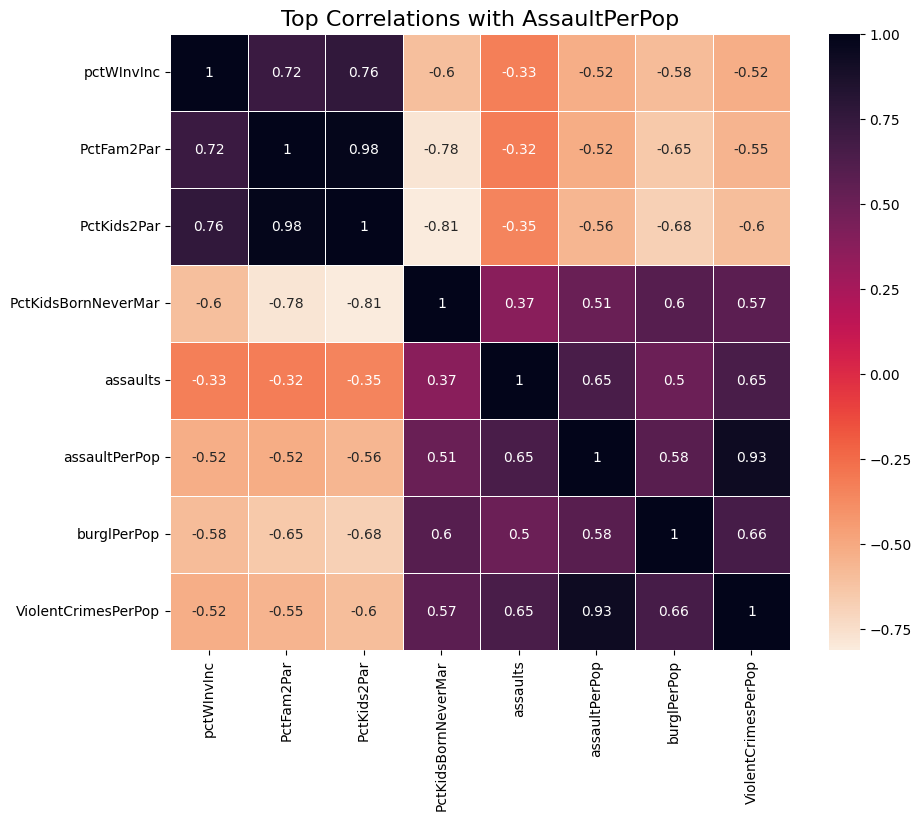

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='rocket_r', linewidths=0.5)
plt.title('Top Correlations with AssaultPerPop', fontsize=16)
plt.show()

In [ ]:
# # Define predictors for the regression model
# family_df = data_numeric[['PctKids2Par', 'PctKidsBornNeverMar', 'PctFam2Par',
#         'PctYoungKids2Par', 'PctTeen2Par']]
# target = 'assaultPerPop'  # Ensure this column exists in your cleaned data

# # Check if target variable exists and remove rows with NaN in target
# if target in data_numeric.columns:
#     family_df[target] = data_numeric[target]
#     family_df.dropna(subset=[target], inplace=True)


## Predictor and Target Variable Definition

In [ ]:
# Define the target variable
target = 'assaultPerPop'

# Ensure the target variable exists in your cleaned data
if target in data_numeric.columns:
    # Create a new DataFrame with selected features
    key_features = [
        'PctKids2Par',
        'PctKidsBornNeverMar',
        'PctFam2Par',
        'PctYoungKids2Par',
        'PctTeen2Par'
    ]

    # Check if all selected features are in the data
    key_features = [feature for feature in key_features if feature in data_numeric.columns]


In [ ]:
# Create a DataFrame for the selected features
family_df = data_numeric[key_features + [target]].dropna()


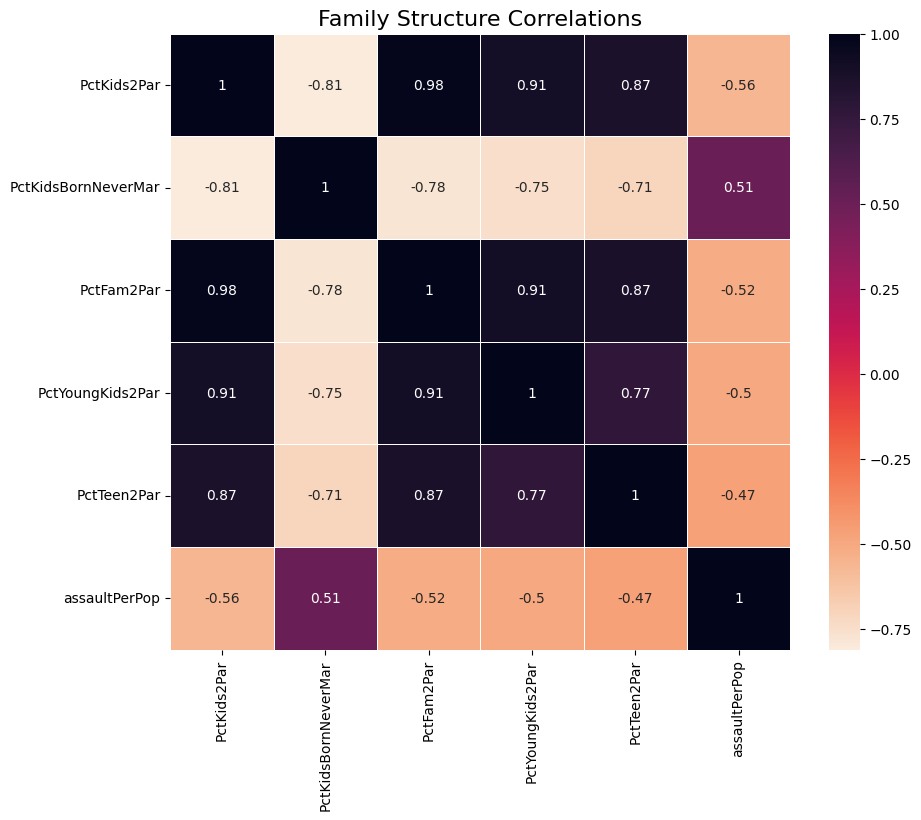

In [ ]:
#Correlation matrix of selected features
# (for visualisation, bottom row is important the features are all compared to assaultPerPop)
# Notice the negative correlation most of the features have
new_corrMatrix = family_df.corr()

#Heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(new_corrMatrix, annot=True, cmap='rocket_r', linewidths=0.5)
plt.title('Family Structure Correlations', fontsize=16)
plt.show()

## Variable Distrubition

Text(0, 0.5, 'Assaults Per Population')

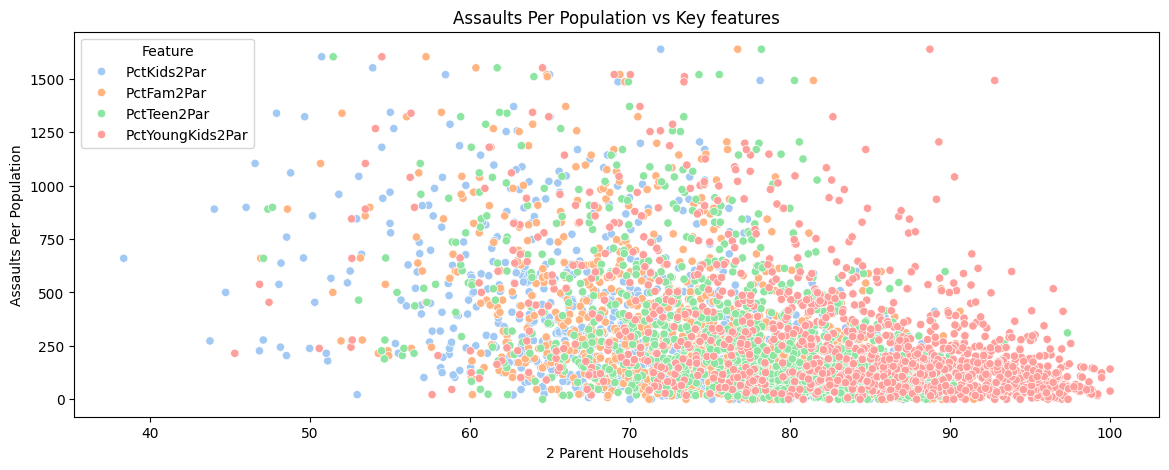

In [ ]:
# Create a figure with subplots
num_features = len(key_features)
plt.figure(figsize=(14,5))

# Scatterplots for each feature's distribution with target
x = data_cleaned['assaultPerPop']
kids = data_cleaned['PctKids2Par']
nevermarr = data_cleaned['PctKidsBornNeverMar']
fam= data_cleaned['PctFam2Par']
yongkids= data_cleaned['PctYoungKids2Par']
teen= data_cleaned['PctTeen2Par']


# Convert data to long-form
long_data = data_cleaned.melt(id_vars='assaultPerPop',
                      value_vars=['PctKids2Par', 'PctFam2Par','PctTeen2Par','PctYoungKids2Par'],
                      var_name='Feature',
                      value_name='X')


sns.scatterplot(data=long_data, x='X', y='assaultPerPop', hue='Feature')
plt.title('Multiple Features on One Scatter Plot')
#plt.show()
plt.title(f'Assaults Per Population vs Key features')
plt.xlabel('2 Parent Households')
plt.ylabel('Assaults Per Population')


# Adjust layout
#plt.tight_layout()
#plt.show()

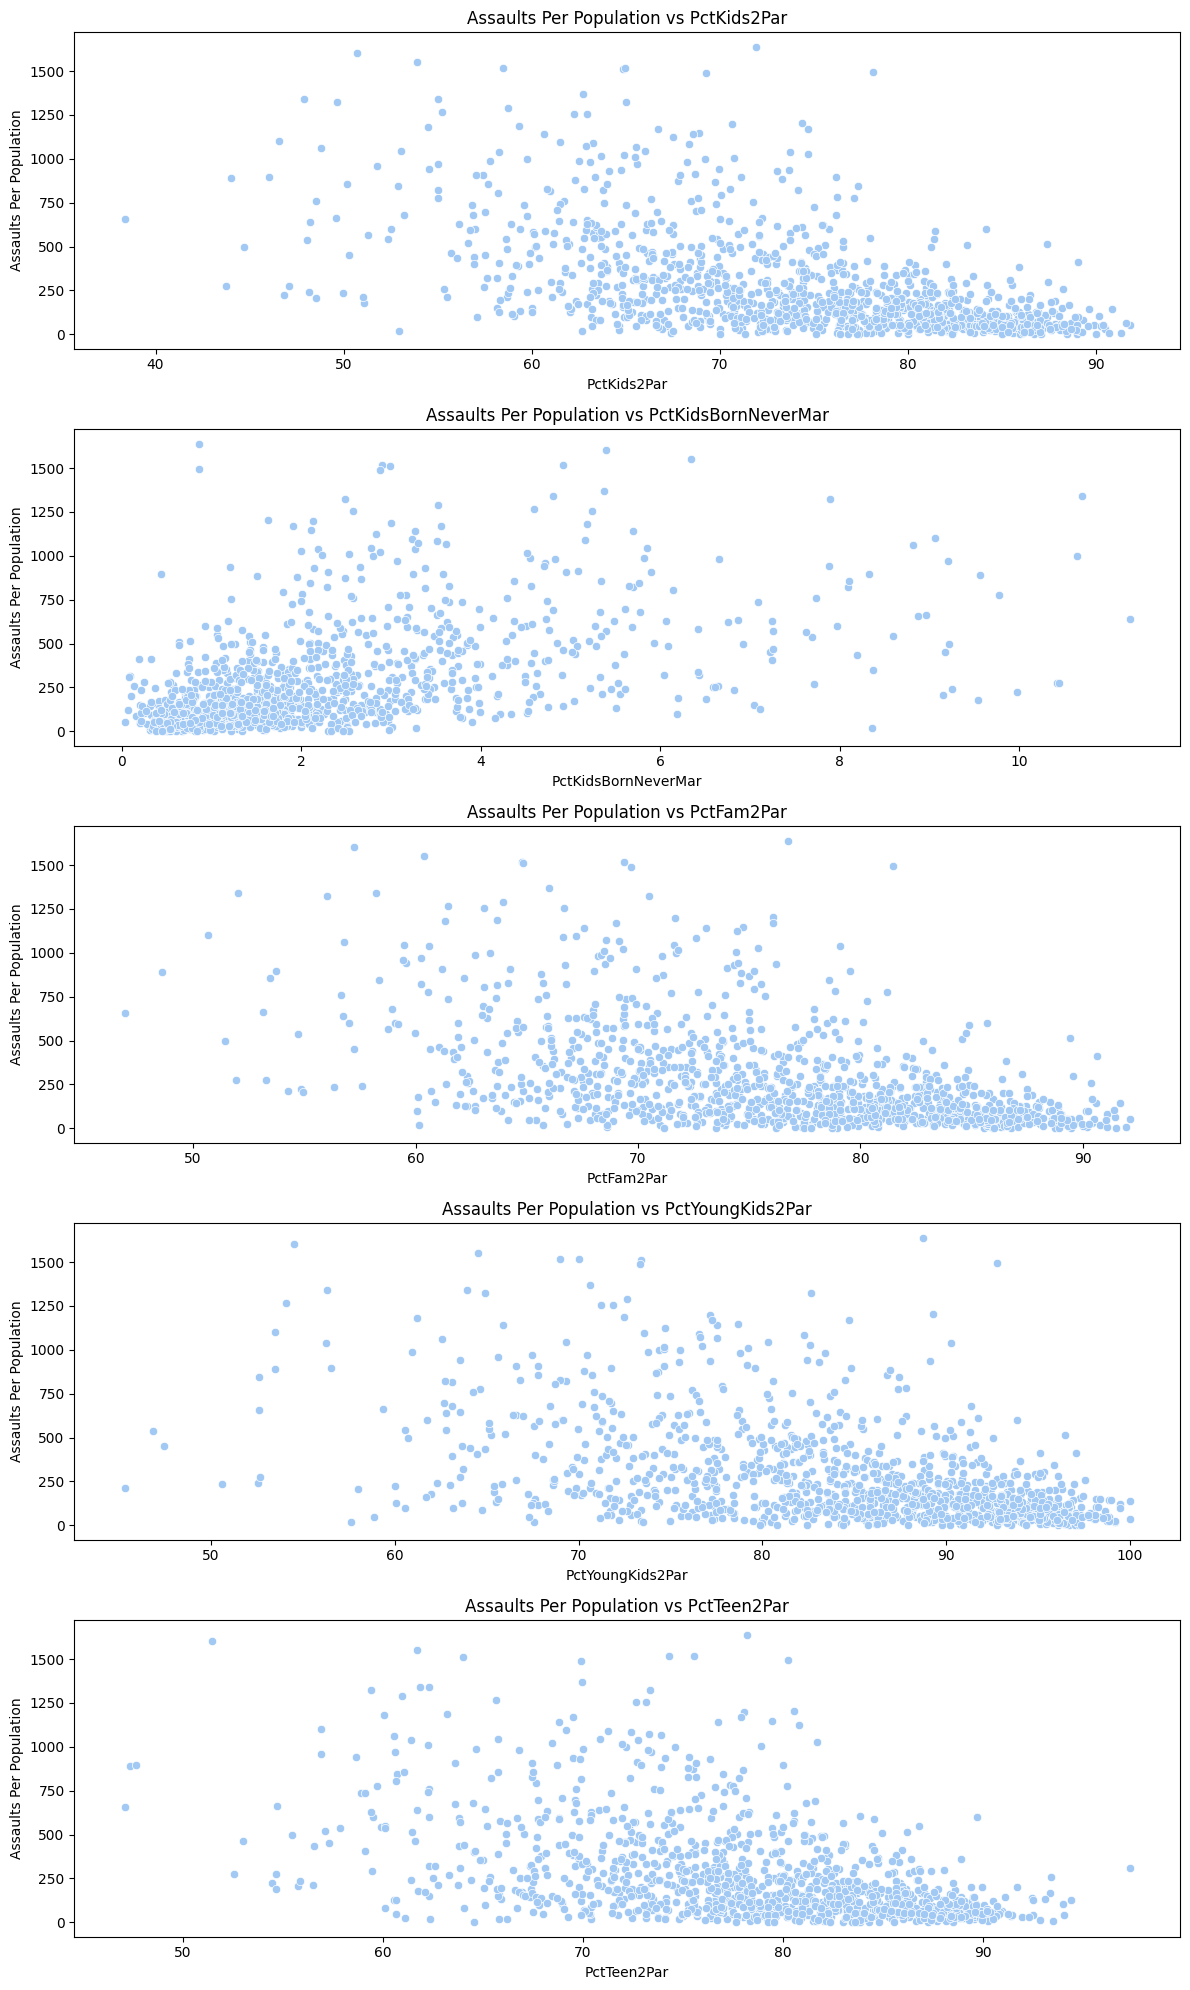

In [ ]:
# Create a figure with subplots
num_features = len(key_features)
plt.figure(figsize=(12, 20))

# Scatterplots for each feature's distribution with target
for i, feature in enumerate(key_features):
    plt.subplot(num_features, 1, i + 1)
    sns.scatterplot(data=data_cleaned, x=feature, y='assaultPerPop')
    plt.title(f'Assaults Per Population vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Assaults Per Population')


# Adjust layout
plt.tight_layout()
plt.show()

## Regression Modeling ( Random Forest, Linear, Logistic, KNN)

Gradient boosted, and SVM

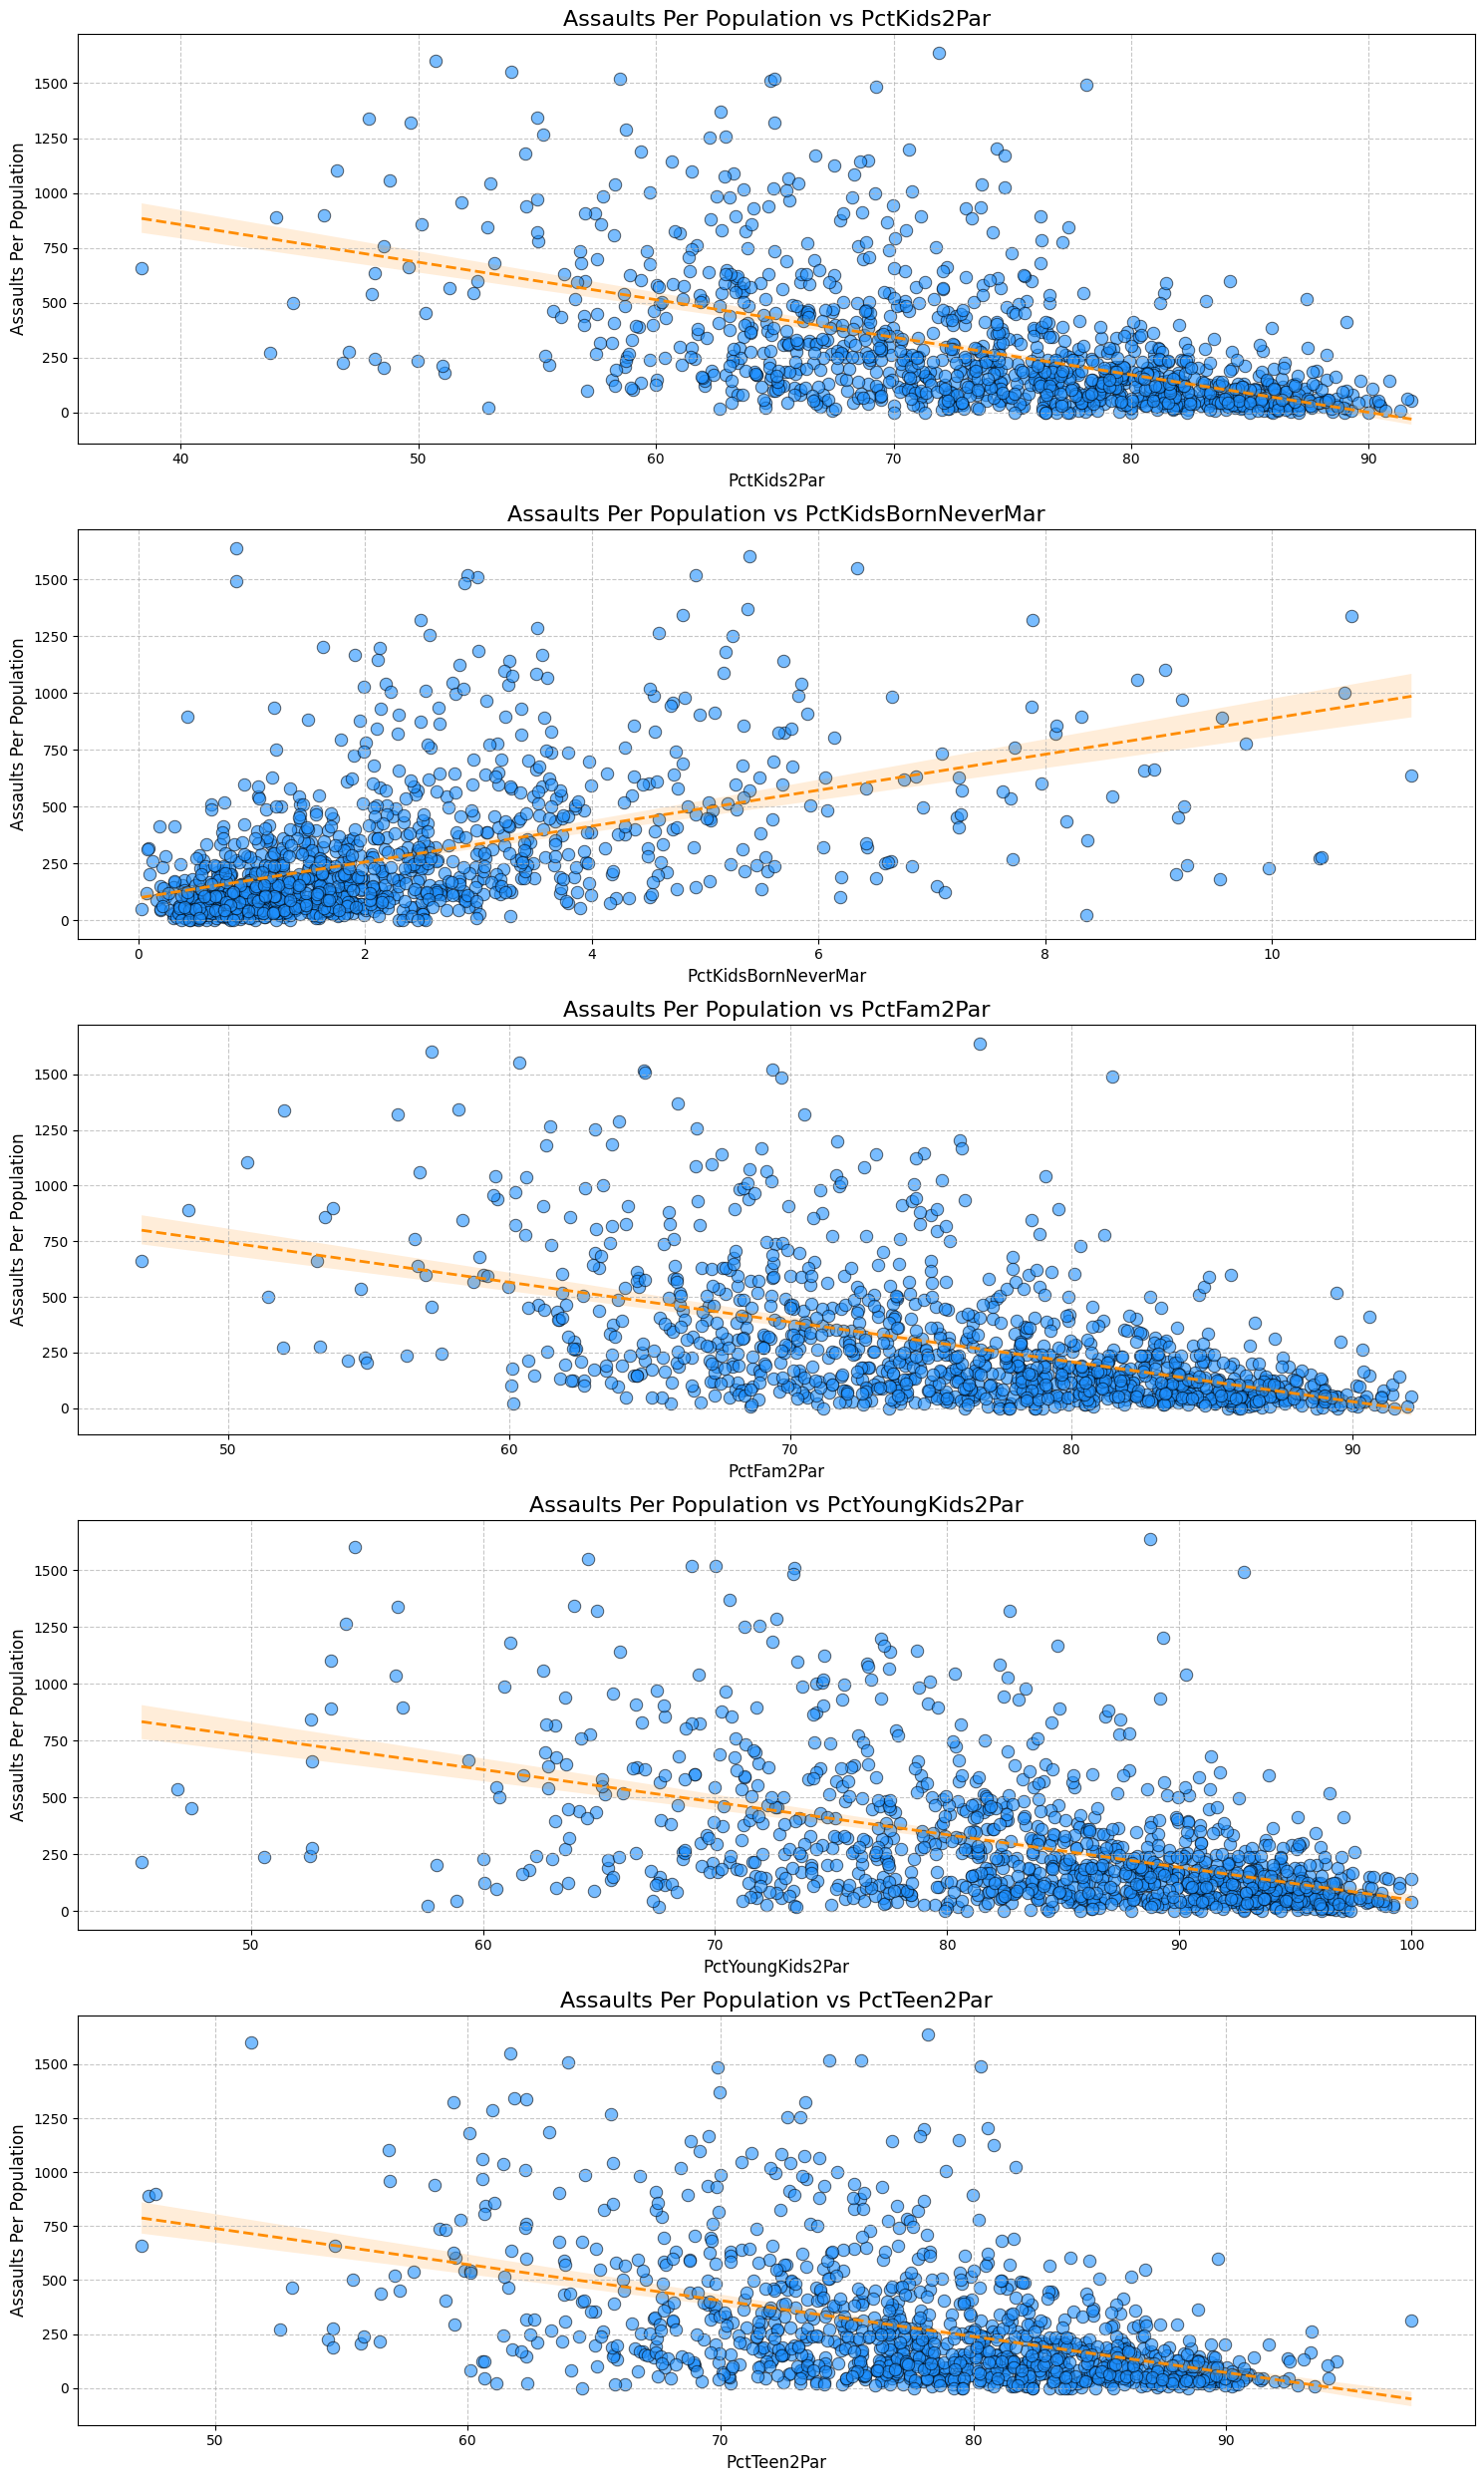

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
num_features = len(key_features)
plt.figure(figsize=(15, 5 * num_features))

# Scatterplots for each feature's distribution with target
for i, feature in enumerate(key_features):
    plt.subplot(num_features, 1, i + 1)

    # Scatterplot with better styling
    sns.scatterplot(data=data_cleaned, x=feature, y='assaultPerPop',
                    color='dodgerblue', edgecolor='black', alpha=0.6, s=80)

    # Optionally add a regression line
    sns.regplot(data=data_cleaned, x=feature, y='assaultPerPop',
                scatter=False, color='darkorange', line_kws={'linewidth': 2, 'linestyle': '--'})

    # Titles and labels
    plt.title(f'Assaults Per Population vs {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Assaults Per Population', fontsize=12)

    # Adding grid and other visual tweaks
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

# Show the plot
plt.show()


5


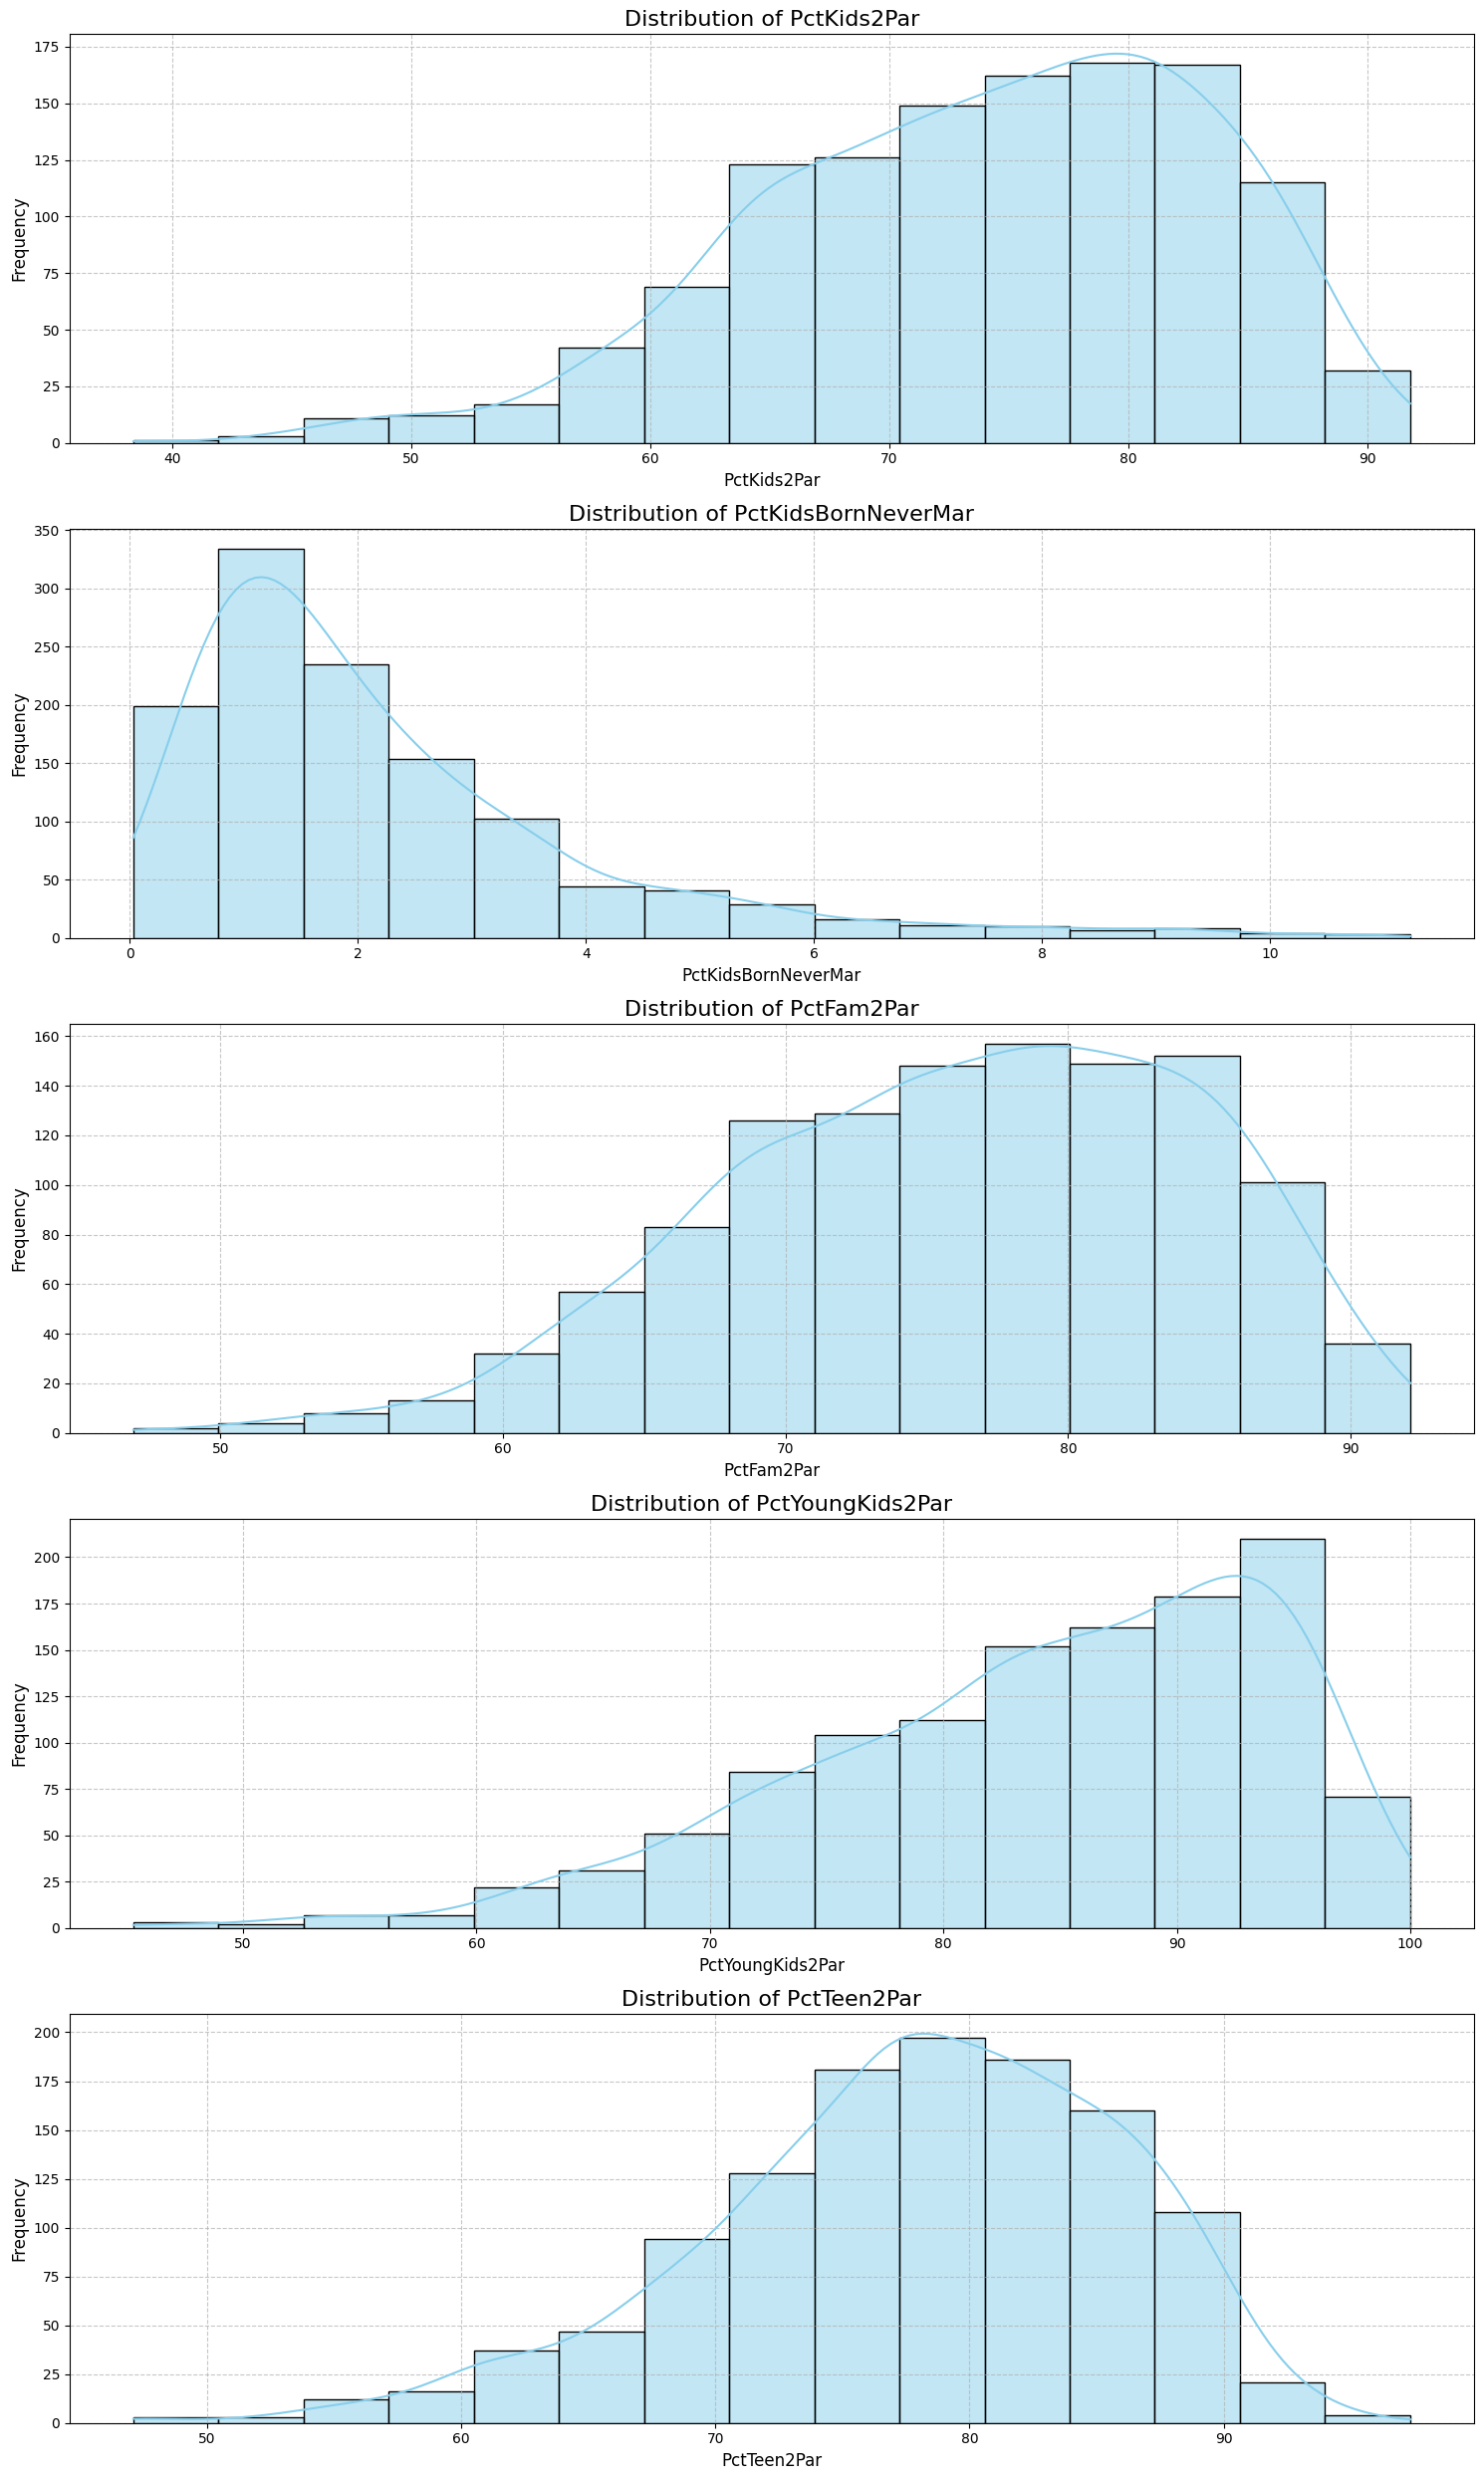

In [ ]:


# Create a figure with subplots
num_features = len(key_features)
plt.figure(figsize=(15, 5 * num_features))

# Loop over each feature to plot its distribution
for i, feature in enumerate(key_features):
    plt.subplot(num_features, 1, i + 1)

    # Plot histogram and KDE for each feature
    sns.histplot(data_cleaned[feature], bins=15, kde=True, color='skyblue', edgecolor='black')

    # Titles and labels
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Adding grid for better visibility
    plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

print(num_features)
# Show the plot
plt.show()


In [ ]:
# Split the dataset into features and target variable
X = family_df[key_features]
y = family_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Create a DataFrame for the selected features
family_df = data_numeric[key_features + [target]].dropna()


In [ ]:
family_df.count().sum()

7182

In [ ]:
import scipy.stats as stats
#LINEAR REGRESSION MODEL
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Make predictions
y_pred_linear = linear_model.predict(X_test)

#Evaluate the model using MAE, MSE, RMSE and R^2
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)


print(f'Linear Regression Model Evaluation:')
print(f'MAE: {mae_linear:.2f}')
print(f'MSE: {mse_linear:.2f}')
print(f'RMSE: {rmse_linear:.2f}')
print(f'R²: {r2_linear:.2f}')

import numpy as np
import scipy.stats as stats

# Assuming you already have a trained linear regression model and data (X, y)
coefficients = linear_model.coef_
intercept = linear_model.intercept_
predictions = linear_model.predict(X)

# Calculate residuals (errors)
residuals = y - predictions

# Estimate the variance of residuals (Mean Squared Error)
mse = np.mean(residuals ** 2)

# Calculate the variance-covariance matrix for the coefficients
X_ = np.array(X)  # Make sure X is a numpy array
cov_matrix = np.linalg.inv(X_.T @ X_) * mse

# Standard errors of the coefficients
standard_errors = np.sqrt(np.diagonal(cov_matrix))

# Calculate t-statistics
t_stats = coefficients / standard_errors

# Calculate p-values (two-tailed test)
p_values = [stats.t.cdf(-np.abs(t), df=len(y) - X_.shape[1]) for t in t_stats]


# Print results
print(f"Coefficients: {coefficients}")
print(f"Standard Errors: {standard_errors}")
print(f"T-statistics: {t_stats}")
print(f"P-values: {p_values}")


Linear Regression Model Evaluation:
MAE: 159.63
MSE: 55502.65
RMSE: 235.59
R²: 0.36
Coefficients: [-39.85850668  13.23194862  30.504        0.35150633  -1.22030316]
Standard Errors: [4.03884465 4.36227114 4.58147516 1.69275319 1.68055085]
T-statistics: [-9.86878926  3.03327056  6.65811751  0.20765362 -0.72613284]
P-values: [1.9510602611406623e-22, 0.00123575780675975, 2.1112697859900457e-11, 0.4177674508111634, 0.2339499456038301]


In [ ]:
feature_names = ['Intercept'] + list(X.columns[1:])  # Adding 'Intercept' as the first feature
for feature, coef, p_value in zip(feature_names, [intercept] + list(coefficients), [None] + p_values):
    print(f"{feature}: Coefficient = {coef}, p-value = {p_value}")

Intercept: Coefficient = 929.4640645838615, p-value = None
PctKidsBornNeverMar: Coefficient = -39.85850668252013, p-value = 1.9510602611406623e-22
PctFam2Par: Coefficient = 13.23194862282692, p-value = 0.00123575780675975
PctYoungKids2Par: Coefficient = 30.503999997036637, p-value = 2.1112697859900457e-11
PctTeen2Par: Coefficient = 0.3515063337151847, p-value = 0.4177674508111634


In [ ]:
# RANDOM FOREST REGRESSION MODEL
rf_model = RandomForestRegressor(n_estimators=1000, random_state = 42)
rf_model.fit(X_train, y_train)

#Make predictions again
y_pred_rf = rf_model.predict(X_test)

#Evaluate the model using MAE, MSE, RMSE and R^2
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


print(f'Random Forest Model Evaluation:')
print(f'MAE: {mae_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R²: {r2_rf:.2f}')

Random Forest Model Evaluation:
MAE: 165.22
MSE: 59099.91
RMSE: 243.10
R²: 0.32


In [ ]:
# KNN REGRESSION MODEL
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make predictions again
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model using MAE, MSE, RMSE and R^2
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)


print(f'KNN Model Evaluation:')
print(f'MAE: {mae_knn:.2f}')
print(f'MSE: {mse_knn:.2f}')
print(f'RMSE: {rmse_knn:.2f}')
print(f'R²: {r2_knn:.2f}')

KNN Model Evaluation:
MAE: 174.65
MSE: 65793.23
RMSE: 256.50
R²: 0.25


In [ ]:
# Compile predictions into a comparison table
comparison_table = pd.DataFrame({
    "Actual Test": y_test,
    "Baseline Predictions": y_pred_linear,

    "Random Forest Pred": y_pred_rf,
    "KNN Pred": y_pred_knn

})

# Print the comparison table
comparison_table.head()

,Actual Test,Baseline Predictions,Random Forest Pred,KNN Pred
1684,117.01,189.088853,218.17321,201.390
584,152.31,199.510078,213.12039,71.572
185,130.73,362.401639,491.52111,315.242
1683,261.24,196.081077,177.65349,253.484
102,145.76,50.864459,50.16516,67.010


In [ ]:
import statsmodels.api as sm

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),

}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)



    print(f"Model: {model_name}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} Cross-Validation Scores: {-cv_scores}")
    print(f"{model_name} Cross-Validation Mean: {-cv_scores.mean()}\n")

    #find p-value for regressions


Model: Linear Regression
MSE: 55502.6501
MAE: 159.6311
RMSE: 235.5900
R-squared: 0.3639
Linear Regression Cross-Validation Scores: [58982.8593533  71866.75560392 40173.72583416 55216.09475532
 43645.92625593]
Linear Regression Cross-Validation Mean: 53977.072360526676

Model: Decision Tree
MSE: 124564.0301
MAE: 227.7705
RMSE: 352.9363
R-squared: -0.4276
Decision Tree Cross-Validation Scores: [144724.13577448 100100.77364229  93753.04673891 119719.89366056
  78814.25332782]
Decision Tree Cross-Validation Mean: 107422.42062881442

Model: Random Forest
MSE: 60303.2025
MAE: 167.0967
RMSE: 245.5671
R-squared: 0.3089
Random Forest Cross-Validation Scores: [65880.00319303 70150.55128042 40729.57269334 56797.11186408
 45630.00124499]
Random Forest Cross-Validation Mean: 55837.44805517207

Model: K-Nearest Neighbors
MSE: 65793.2349
MAE: 174.6523
RMSE: 256.5019
R-squared: 0.2460
K-Nearest Neighbors Cross-Validation Scores: [68212.00884804 76645.26211308 52572.20689856 63730.00163364
 50520.11679

In [ ]:
y_pred = model.predict(X_test)

# Step 5: View the final predictions
print("Predictions:", y_pred)

# Compare with actual values
print("Actual values:", y_test)


Predictions: [153.05548021 158.12808721 195.15691402 174.59254812 132.07878513
 180.68704714 140.18413071 156.72528381 167.12835203 146.07641903
 173.71453716 139.16954005 177.4582667  208.88929546 179.92305179
 193.8416361  147.30769777 208.81025575 203.82317463 215.06667824
 148.19371994 230.35803058 169.21318095 188.58256708 173.8831484
 165.97380854 160.78651161 202.51233    148.49189844 217.71212617
 168.64855648 144.60234258 150.94591029 193.77224298 142.70875509
 181.33231677 210.84634597 187.689014   164.13696017 141.51736532
 137.5037262  232.35875758 163.04741425 139.69764067 169.49817967
 214.59716504 222.99800968 191.73510548 196.03122712 151.05038588
 157.37021263 155.67745871 166.19935938 131.23664246 172.22732446
 182.44950917 141.28170583 175.44962697 160.88504469 165.14394421
 140.11932031 203.81230641 141.66503376 215.33246484 215.82209163
 184.81104345 187.82707561 146.15420711 204.93818698 191.60695338
 192.21268262 138.35994534 168.64946196 130.17909181 161.8549059

##Comparison Plots

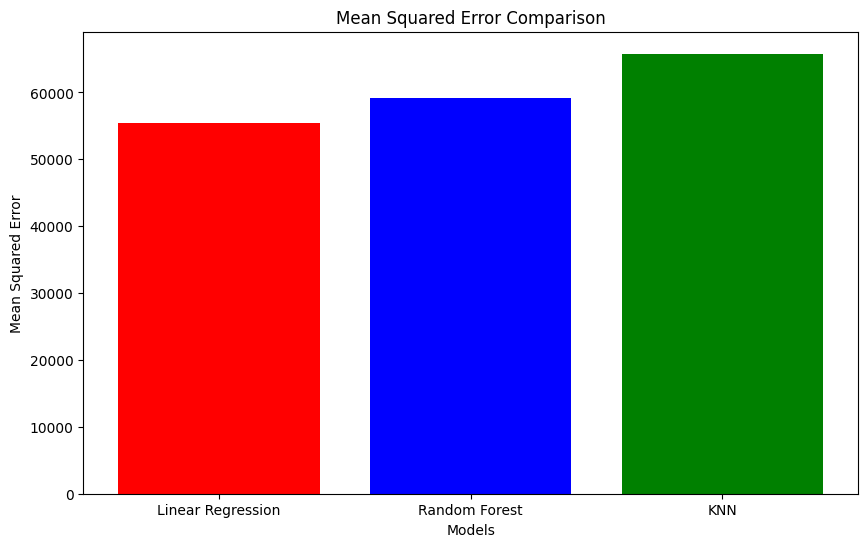

In [ ]:
# MSE comparison plot
mse_scores = [mse_linear, mse_rf, mse_knn]
models = ['Linear Regression', 'Random Forest', 'KNN']
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['red', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.show()


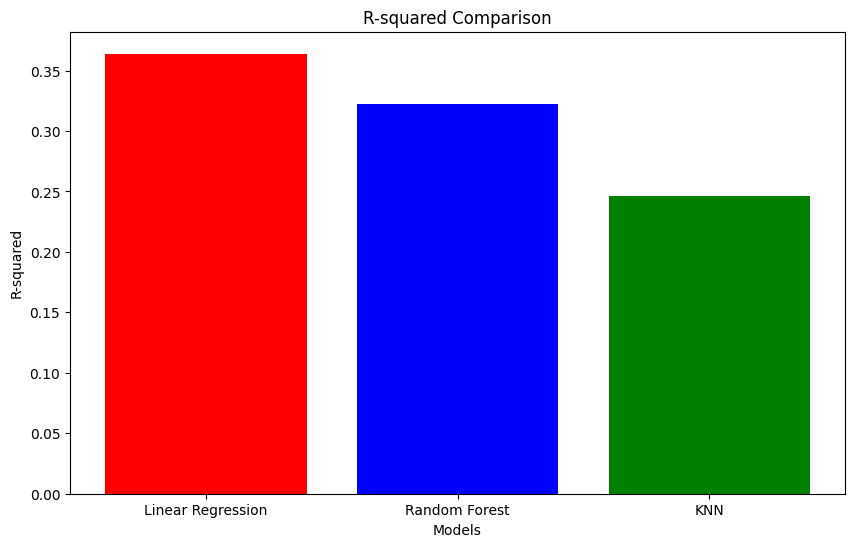

In [ ]:
# R^2 comparison plot
r2_scores = [r2_linear, r2_rf, r2_knn]
models = ['Linear Regression', 'Random Forest', 'KNN']
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['red', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')
plt.show()

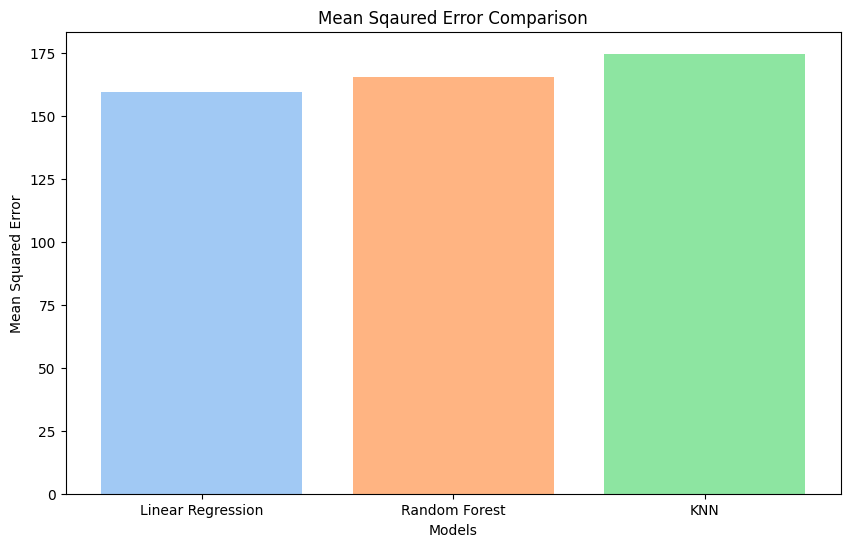

In [ ]:
# Define MSE scores and model names
mse_scores = [mse_linear, mse_rf, mse_knn]
models = ['Linear Regression', 'Random Forest', 'KNN']

# Set Seaborn's pastel color palette
sns.set_palette("pastel")

# Choose a custom pastel palette for distinct colors
pastel_colors = sns.color_palette("pastel", n_colors=3)

plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color=pastel_colors)  # Assigning distinct pastel colors
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Sqaured Error Comparison')
plt.show()

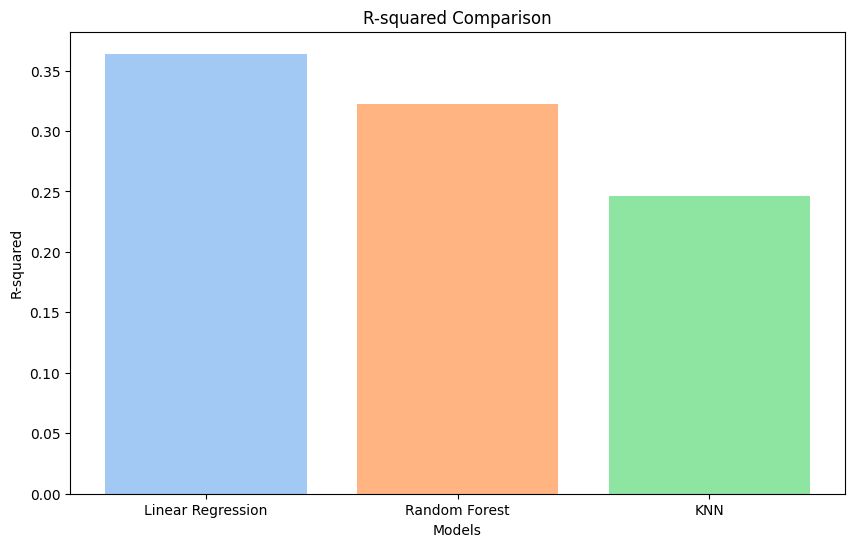

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define R² scores and model names
r2_scores = [r2_linear, r2_rf, r2_knn]
models = ['Linear Regression', 'Random Forest', 'KNN']

# Set Seaborn's pastel color palette
sns.set_palette("pastel")

# Choose a custom pastel palette for distinct colors
pastel_colors = sns.color_palette("pastel", n_colors=3)

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=pastel_colors)  # Assigning distinct pastel colors
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')
plt.show()


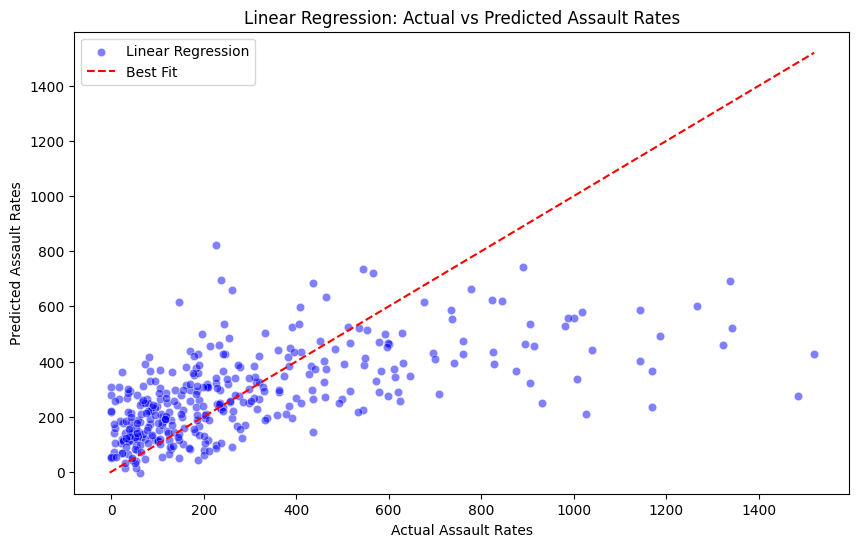

In [ ]:
plt.figure (figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', label='Linear Regression', alpha=0.5)

max_value = max(y_test.max(), y_pred_linear.max())
min_value = min(y_test.min(), y_pred_linear.min())
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Best Fit')

plt.title('Linear Regression: Actual vs Predicted Assault Rates')
plt.xlabel('Actual Assault Rates')
plt.ylabel('Predicted Assault Rates')
plt.legend()
plt.show()

## Classification Models:


Threshhold Establishment

In [ ]:
# Create a binary outcome based on assault rates
assault_threshold = y.median()  # Define a threshold based on the target variable
assault_class = (y > assault_threshold).astype(int)  # Binary target variable

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, assault_class, test_size=0.3, random_state=42)

# Define classification models to evaluate
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Initialize results storage for classification
classification_results = []

# Train and evaluate each model
for model_name, model in classification_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)

    # Evaluate the models
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

    # Cross-validation
    cv_scores_class = cross_val_score(model, X, assault_class, cv=5, scoring='accuracy')

    # Results
    classification_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Cross-Validation Mean Accuracy": cv_scores_class.mean()
    })

# Create a DataFrame to summarize classification results
classification_results_df = pd.DataFrame(classification_results)

# Print the classification results
print("\nClassification Model Results:")
print(classification_results_df)


Classification Model Results:
                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression  0.736111   0.808642  0.671795  0.733894   
1        Decision Tree  0.655556   0.683938  0.676923  0.680412   
2        Random Forest  0.713889   0.758427  0.692308  0.723861   
3          Naive Bayes  0.722222   0.832168  0.610256  0.704142   
4  K-Nearest Neighbors  0.736111   0.774725  0.723077  0.748011   
5    Gradient Boosting  0.736111   0.780899  0.712821  0.745308   

   Cross-Validation Mean Accuracy  
0                        0.745997  
1                        0.651625  
2                        0.715108  
3                        0.707584  
4                        0.708438  
5                        0.724341  
